In [2]:
#importing essential libraries
import numpy as np
import pandas as pd

In [46]:
#connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
#loading dataset
data=pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t',quoting=3)

In [48]:
#shape = tuple of array dimension(row,column)
data.shape

(1000, 2)

In [49]:
#returns the label of each column in the DataFrame
data.columns

Index(['Review', 'Liked'], dtype='object')

In [50]:
#view the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [51]:
#information about the dataframe
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [55]:
#importing essential libraries for performing natural language processing on the dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
#cleaning the reviews
corpus = []
for i in range(0,1000):

  #cleaning special character from the reviews
  #the re.sub() method performs global search and global replace on the given string
  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])

  #converting the entire review into lower case
  review = review.lower()

  #tokenizing the review by words
  review_words = review.split()

  #removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

  #stemming the words
  ps = PorterStemmer()
  review = [ps.stem(word) for word in review_words]

  #joining the stemmed words
  review = ' '.join(review)

  corpus.append(review)

In [67]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [92]:
#creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object with a maximum of 1500 features.
vectorizer = TfidfVectorizer(max_features=1500)
                                                                                          #TFID VECTORIZER
# Transform the corpus into a TF-IDF matrix.
X = vectorizer.fit_transform(corpus).toarray()

# Get the target values.
y = data.iloc[:,1].values


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [72]:
#fitting naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [73]:
#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [74]:
#accuracy,precision,recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print('----SCORES----')
print('Accuracy score is: {}%'.format(round(score1*100,2)))
print('Precision score is: {}%'.format(round(score2*100,2)))
print('Recall score is: {}%'.format(round(score3*100,2)))

----SCORES----
Accuracy score is: 76.5%
Precision score is: 76.42%
Recall score is: 78.64%


In [75]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [76]:
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

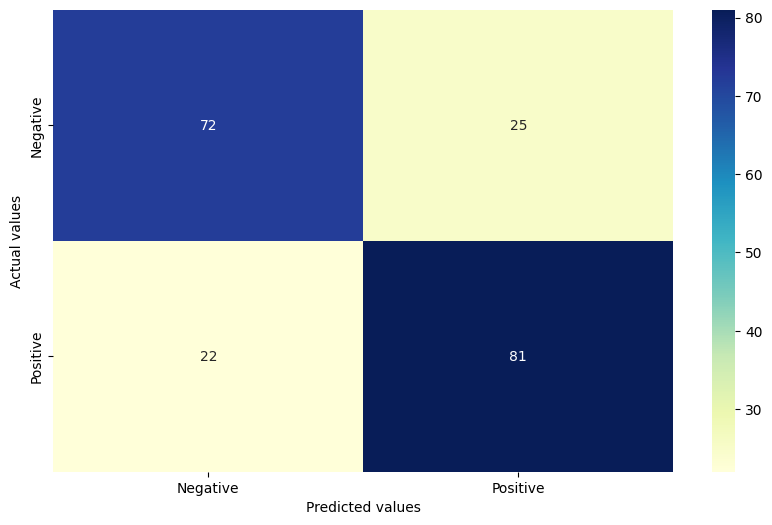

In [77]:
#plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [81]:
#hyperparameter tuning the Naive Bayes Classifier
best_accuracy =0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print('Accuracy score for alpha={} is: {}%'.format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2),round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 78.0%
Accuracy score for alpha=0.2 is: 78.5%
Accuracy score for alpha=0.3 is: 78.0%
Accuracy score for alpha=0.4 is: 78.0%
Accuracy score for alpha=0.5 is: 77.5%
Accuracy score for alpha=0.6 is: 77.5%
Accuracy score for alpha=0.7 is: 77.5%
Accuracy score for alpha=0.8 is: 77.0%
Accuracy score for alpha=0.9 is: 76.5%
Accuracy score for alpha=1.0 is: 76.5%
--------------------------------------
The best accuracy is 78.5% with alpha value as 0.2


In [82]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [170]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)


In [96]:
#predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation,very pleasing.'
if predict_sentiment(sample_review):
  print('This is a POSITIVE review!')
else:
  print('This is a NEGATIVE review')

This is a POSITIVE review!


In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load your restaurant review dataset (replace 'data.csv' with your dataset file)
data=pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t',quoting=3)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment labels for test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)
print('RANDOM FOREST ALGORITHM:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)


RANDOM FOREST ALGORITHM:
Accuracy: 0.74
Precision: 0.7498408812729498
Recall: 0.74
Confusion Matrix:
 [[79 17]
 [35 69]]


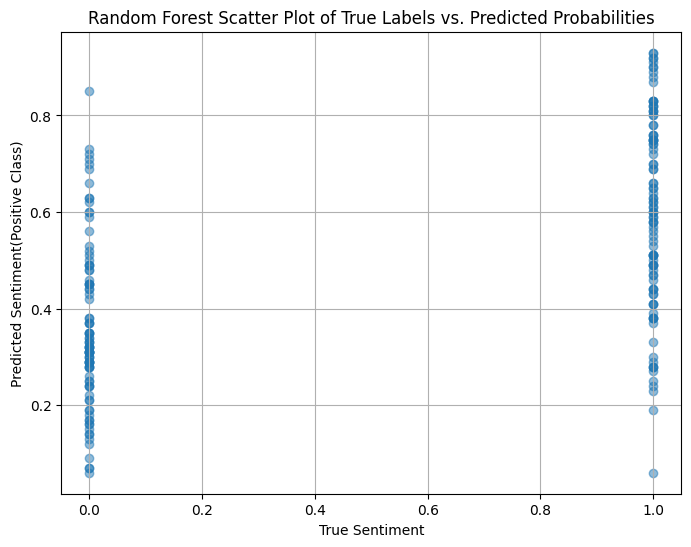

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming that 'y_test' contains true labels and 'y_pred' contains predicted probabilities for the positive class
# Make sure to replace 'y_test' and 'y_pred' with your actual data

# Get predicted probabilities for the positive class (class 1)
y_pred_prob = rf_classifier.predict_proba(X_test_tfidf)[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_prob, alpha=0.5)
plt.xlabel('True Sentiment')
plt.ylabel('Predicted Sentiment(Positive Class)')
plt.title('Random Forest Scatter Plot of True Labels vs. Predicted Probabilities')
plt.grid(True)

plt.show()




In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load your restaurant review dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment labels for test data
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print('SUPPORT VECTOR MACHINE (SVM):')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)


SUPPORT VECTOR MACHINE (SVM):
Accuracy: 0.815
Precision: 0.8213368283093055
Recall: 0.815
Confusion Matrix:
 [[84 12]
 [25 79]]


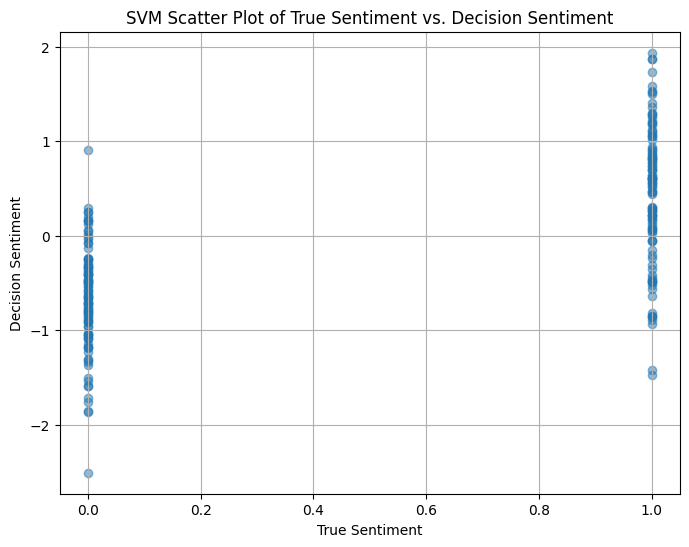

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming that 'y_test' contains true labels and 'svm_classifier' is your trained SVM classifier
# Make sure to replace 'y_test' and 'svm_classifier' with your actual data

# Get decision values (distance to the hyperplane)
decision_values = svm_classifier.decision_function(X_test_tfidf)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, decision_values, alpha=0.5)
plt.xlabel('True Sentiment')
plt.ylabel('Decision Sentiment')
plt.title('SVM Scatter Plot of True Sentiment vs. Decision Sentiment')
plt.grid(True)

plt.show()


In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load your restaurant review dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Logistic Regression classifier
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment labels for test data
y_pred = logistic_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print('LOGISTIC REGRESSION:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load your restaurant review dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment labels for test data
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print('SUPPORT VECTOR MACHINE (SVM):')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load your restaurant review dataset (replace 'data.csv' with your dataset file)
data=pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t',quoting=3)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment labels for test data
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)
print('RANDOM FOREST ALGORITHM:')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load your restaurant review dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 5000  # Maximum number of words in your vocabulary
max_sequence_length = 100  # Maximum sequence length (you can adjust this)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode the labels (convert labels to numerical values)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

# Build an RNN model
embedding_dim = 100  # You can adjust this dimension
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SimpleRNN(units=128))  # You can adjust the number of units
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5  # You can adjust the number of epochs
batch_size = 64  # You can adjust the batch size
model.fit(X_train_pad, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test_encoded))

# Evaluate the model
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)  # Convert softmax probabilities to class labels
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
confusion = confusion_matrix(y_test_encoded, y_pred)

print('RECURRENT NEURAL NETWORK (RNN):')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)


LOGISTIC REGRESSION:
Accuracy: 0.795
Precision: 0.8011009174311927
Recall: 0.795
Confusion Matrix:
 [[82 14]
 [27 77]]
SUPPORT VECTOR MACHINE (SVM):
Accuracy: 0.815
Precision: 0.8213368283093055
Recall: 0.815
Confusion Matrix:
 [[84 12]
 [25 79]]
RANDOM FOREST ALGORITHM:
Accuracy: 0.74
Precision: 0.7498408812729498
Recall: 0.74
Confusion Matrix:
 [[79 17]
 [35 69]]
Epoch 1/5
13/13 [==============================] - 3s 112ms/step - loss: 0.7045 - accuracy: 0.5163 - val_loss: 0.6885 - val_accuracy: 0.5600
Epoch 2/5
13/13 [==============================] - 1s 109ms/step - loss: 0.6341 - accuracy: 0.6662 - val_loss: 0.7199 - val_accuracy: 0.4800
Epoch 3/5
13/13 [==============================] - 1s 107ms/step - loss: 0.4737 - accuracy: 0.8850 - val_loss: 0.7069 - val_accuracy: 0.5650
Epoch 4/5
13/13 [==============================] - 1s 108ms/step - loss: 0.2337 - accuracy: 0.9513 - val_loss: 0.7585 - val_accuracy: 0.6050
Epoch 5/5
7/7 [==============================] - 0s 12ms/step
RECURR

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load your restaurant review dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 5000  # Maximum number of words in your vocabulary
max_sequence_length = 100  # Maximum sequence length (you can adjust this)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode the labels (convert labels to numerical values)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

# Build an RNN model
embedding_dim = 100  # You can adjust this dimension
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SimpleRNN(units=128))  # You can adjust the number of units
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5  # You can adjust the number of epochs
batch_size = 64  # You can adjust the batch size
model.fit(X_train_pad, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test_encoded))

# Evaluate the model
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)  # Convert softmax probabilities to class labels
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
confusion = confusion_matrix(y_test_encoded, y_pred)

print('RECURRENT NEURAL NETWORK (RNN):')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)


Epoch 1/5
13/13 [==============================] - 3s 86ms/step - loss: 0.6925 - accuracy: 0.5213 - val_loss: 0.6921 - val_accuracy: 0.5150
Epoch 2/5
13/13 [==============================] - 1s 64ms/step - loss: 0.5722 - accuracy: 0.8163 - val_loss: 0.6712 - val_accuracy: 0.5450
Epoch 3/5
13/13 [==============================] - 1s 61ms/step - loss: 0.3955 - accuracy: 0.9075 - val_loss: 0.6673 - val_accuracy: 0.6000
Epoch 4/5
13/13 [==============================] - 1s 62ms/step - loss: 0.1809 - accuracy: 0.9812 - val_loss: 0.7318 - val_accuracy: 0.6200
Epoch 5/5
7/7 [==============================] - 0s 18ms/step
RECURRENT NEURAL NETWORK (RNN):
Accuracy: 0.62
Precision: 0.629458453906573
Recall: 0.62
Confusion Matrix:
 [[69 27]
 [49 55]]


In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load your restaurant review dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('/content/drive/MyDrive/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# Tokenize and pad the text data
max_words = 5000  # Maximum number of words in your vocabulary
max_sequence_length = 100  # Maximum sequence length (you can adjust this)
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Encode the labels (convert labels to numerical values)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

# Build a CNN model
embedding_dim = 100  # You can adjust this dimension
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5  # You can adjust the number of epochs
batch_size = 64  # You can adjust the batch size
model.fit(X_train_pad, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test_encoded))

# Evaluate the model
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)  # Convert softmax probabilities to class labels
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
confusion = confusion_matrix(y_test_encoded, y_pred)

print('CONVOLUTIONAL NEURAL NETWORK (CNN):')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)


Epoch 1/5
13/13 [==============================] - 4s 121ms/step - loss: 0.6898 - accuracy: 0.5512 - val_loss: 0.6820 - val_accuracy: 0.5950
Epoch 2/5
13/13 [==============================] - 1s 75ms/step - loss: 0.6439 - accuracy: 0.8438 - val_loss: 0.6563 - val_accuracy: 0.7050
Epoch 3/5
13/13 [==============================] - 1s 48ms/step - loss: 0.5570 - accuracy: 0.9150 - val_loss: 0.5974 - val_accuracy: 0.7350
Epoch 4/5
13/13 [==============================] - 1s 49ms/step - loss: 0.3889 - accuracy: 0.9500 - val_loss: 0.5042 - val_accuracy: 0.7850
Epoch 5/5
7/7 [==============================] - 0s 7ms/step
CONVOLUTIONAL NEURAL NETWORK (CNN):
Accuracy: 0.785
Precision: 0.7865608788526092
Recall: 0.785
Confusion Matrix:
 [[70 26]
 [17 87]]


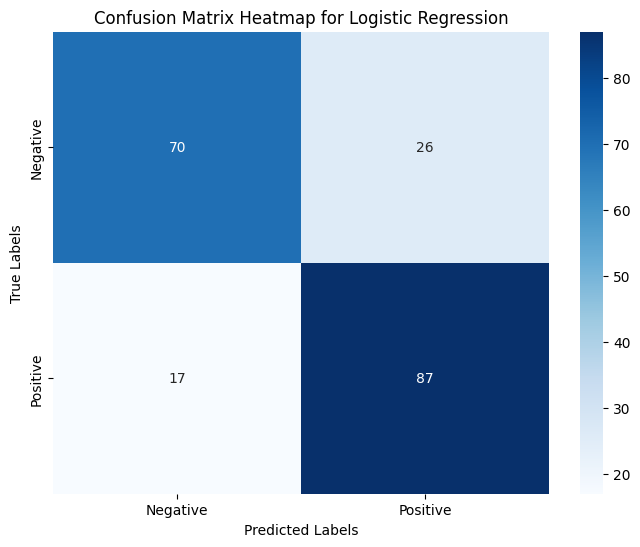

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Logistic Regression')
plt.show()
